In [1]:
#52. What is a Category data type?

In [4]:
import pandas as pd
import os

In [3]:
os.getcwd()

'C:\\Users\\shimi\\OneDrive\\Documents\\Udemy\\Udemy_Python-For-Data-Science\\Python A-Z™ - Python For Data Science With Real Exercises!\\06 - Advanced Visualization'

In [10]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [11]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
len(movies)

559

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [12]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [22]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [13]:
#Change categories

movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [27]:
movies.Genre.cat.categories #unique()

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [28]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [1]:
#53. Working with JointPlots

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Jointplots

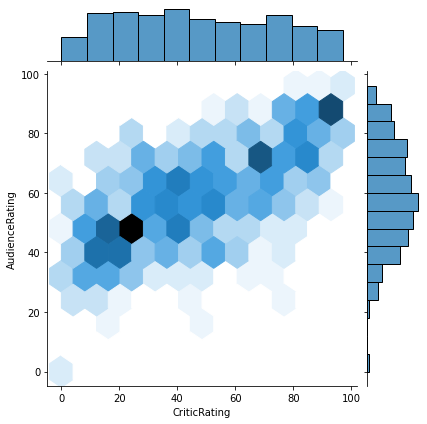

In [22]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind="hex")

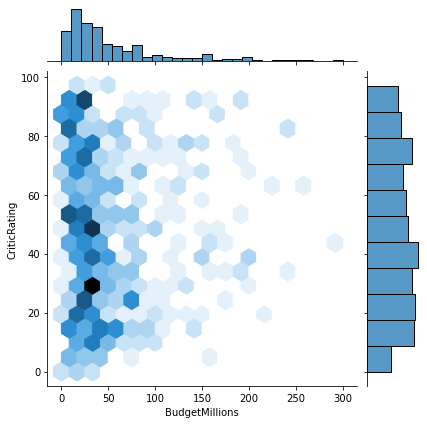

In [24]:
j = sns.jointplot(data=movies, y='CriticRating', x='BudgetMillions', kind="hex")

In [25]:
movies[movies.BudgetMillions > 200]

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
33,Avatar,Action,83,92,237,2009
167,Harry Potter and the Half-Blood Prince,Adventure,83,75,250,2009
303,Pirates of the Caribbean: On Stranger Tides,Action,34,61,250,2011
304,Pirates of the Caribbean: At World's End,Action,45,74,300,2007
314,Quantum of Solace,Action,64,62,230,2008
360,Spider-Man 3,Action,61,54,258,2007
501,Transformers: Revenge of the Fallen,Action,20,76,210,2009


In [26]:
#54. Histograms